## Introduction


## About dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls ./wind_turbine/

fault_data.csv*  scada_data.csv*  status_data.csv*


In [3]:
fault_data = pd.read_csv("./wind_turbine/fault_data.csv", parse_dates=["DateTime"], index_col="DateTime")
scada_data = pd.read_csv("./wind_turbine/scada_data.csv", parse_dates=["DateTime"], index_col="DateTime")
status_data = pd.read_csv("./wind_turbine/status_data.csv", parse_dates=["Time"], dayfirst=True, index_col="Time")

In [4]:
fault_data.head()

,Time,Fault
DateTime,,
2014-05-14 14:39:44,1.400096e+09,GF
2014-05-14 14:50:24,1.400097e+09,GF
2014-05-14 14:58:56,1.400098e+09,GF
2014-05-14 15:09:36,1.400098e+09,GF
2014-05-14 15:20:16,1.400099e+09,GF


In [5]:
scada_data.head()

,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-05-01 00:00:00,1398920448,0,6.9,9.4,2.9,0.0,0.02,0.0,0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2014-05-01 00:09:00,1398920960,0,5.3,8.9,1.6,0.0,0.01,0.0,0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2014-05-01 00:20:00,1398921600,0,5.0,9.5,1.4,0.0,0.04,0.0,0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2014-05-01 00:30:00,1398922240,0,4.4,8.3,1.3,0.0,0.08,0.0,0,0,...,23,21,25,12,14,24,34,2501,25.272728,1.103713
2014-05-01 00:39:00,1398922752,0,5.7,9.7,1.2,0.0,0.05,0.0,0,0,...,23,21,25,12,14,23,34,2501,25.272728,1.103713


In [6]:
status_data.head()

,Main Status,Sub Status,Full Status,Status Text,T,Service,FaultMsg,Value0
Time,,,,,,,,
2014-04-24 12:37:38,0,0,0 : 0,Turbine in operation,1,False,False,7.4
2014-04-25 19:27:24,71,104,71 : 104,Insulation monitoring : Insulation fault Phase U2,6,False,True,20.5
2014-04-26 09:30:13,8,0,8 : 0,Maintenance,6,True,False,17.1
2014-04-26 10:05:19,8,0,8 : 0,Maintenance,6,False,False,8.7
2014-04-26 10:05:25,8,0,8 : 0,Maintenance,6,True,False,10.6


In [7]:
# check datasets sizes
print("Fault data shape:", fault_data.shape)
print("SCADA data shape:", scada_data.shape)
print("Status data shape:", status_data.shape)

Fault data shape: (553, 2)
SCADA data shape: (49027, 65)
Status data shape: (1849, 8)


#### Observation

The fault and status data contains less samples than the total SCADA data because they only include timestamps when a failure actually occured in the wind turbine, so we need to consider that we combining the fault features into the SCADA data.

In [8]:
# check datasets datetime ranges
print(f"Fault data datetime range from {fault_data.index[0]} to {fault_data.index[-1]}")
print(f"SCADA data datetime range from {scada_data.index[0]} to {scada_data.index[-1]}")
print(f"Status data datetime range from {status_data.index[0]} to {status_data.index[-1]}")

Fault data datetime range from 2014-05-14 14:39:44 to 2015-01-15 23:09:20
SCADA data datetime range from 2014-05-01 00:00:00 to 2015-04-09 00:00:00
Status data datetime range from 2014-04-24 12:37:38 to 2015-04-28 22:18:19


#### Observation

The status data is recorded on a larger datetime range compared to the SCADA data, so to combine the status values with the scada and fault datasets we will be forced to drop some of the additional status record that aren't presents in the two other datasets and thus our study datetime range will be from 2014-05-01 00:00:00 to 2015-04-09 00:00:00.

In [9]:
from datetime import datetime

print("Fault data date/time from DateTime:", fault_data.index[0])
print("Fault data date/time from Timestamp:", datetime.fromtimestamp(fault_data["Time"][0]))

Fault data date/time from DateTime: 2014-05-14 14:39:44
Fault data date/time from Timestamp: 2014-05-14 20:39:44


#### Observation

In both the fault and SCADA datasets it seems that the recorded datetime values are lagging 6 hours behind the recorded timestamp, and the status data contains the lagging datetime values. Because the timestamps records seems more accurate between the fault and SCADA datasets will using them as indexes, and we will have to change the status data timestamps later on.

In [10]:
# change the indexes using "TIME" timestamps
# convert to readable datetimes
fault_data.index = fault_data.Time.apply(lambda x: datetime.fromtimestamp(x))
fault_data = fault_data.drop(["Time"], axis=1)

scada_data.index = scada_data.Time.apply(lambda x: datetime.fromtimestamp(x))
scada_data = scada_data.drop(["Time"], axis=1)

In [11]:
# Check if there are missing values
print("Missing values in Fault data:", (fault_data.isna().sum()).sum())
print("Missing values in SCADA data:", (scada_data.isna().sum()).sum())
print("Missing values in Status data:", (status_data.isna().sum()).sum())

Missing values in Fault data: 0
Missing values in SCADA data: 0
Missing values in Status data: 0


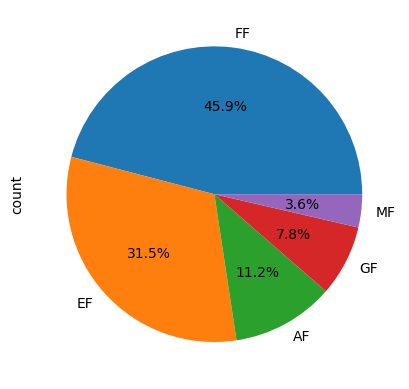

In [12]:
# Check fault classes distribution
_ = fault_data["Fault"].value_counts().plot(kind="pie", autopct='%1.1f%%')

#### Observation

Our data reveals five fault types, with "EF" and "FF" being more prevalent. This suggests that these fault types are likely the most frequently occurring in wind turbines. On the other hand, "MF," "GF," and "AF" faults are less prominent, indicating they may be rare or associated with critical failures in wind turbines, occurring only in extreme situations.

In [13]:
#Check for duplicated datetimes
print("Duplicated datetimes in Fault data:", (fault_data.index.duplicated()).sum())
print("Duplicated datetimes in SCADA data:", (scada_data.index.duplicated()).sum())
print("Duplicated datetimes in Status data:", (status_data.index.duplicated()).sum())

Duplicated datetimes in Fault data: 107
Duplicated datetimes in SCADA data: 6
Duplicated datetimes in Status data: 34


#### Observation

We observe duplicates in all our datasets, but it's important to note that they carry different significance. In the SCADA data, duplicated records can be easily eliminated. However, in the status and fault data, duplicated datetime records indicate instances when two or more fault types occur simultaneously in the wind turbine. These occurrences are crucial for our study.

To address datetime instances with multiple fault types, we will implement one-hot encoding for each fault type at a given datetime.

In [14]:
# drop duplicated instances in SCADA data
scada_data = scada_data[~scada_data.index.duplicated()]

### Handle multiple faults occurances

In [15]:
faults = fault_data.groupby(fault_data.index)['Fault'].apply(lambda x: ','.join(x.astype(str)))
fault_classes = faults.str.get_dummies(sep=',')
fault_classes.set_index(faults.index)
fault_classes.head()

,AF,EF,FF,GF,MF
Time,,,,,
2014-05-14 20:39:44,0,0,0,1,0
2014-05-14 20:50:24,0,0,0,1,0
2014-05-14 20:58:56,0,0,0,1,0
2014-05-14 21:09:36,0,0,0,1,0
2014-05-14 21:20:16,0,0,0,1,0


In [16]:
# check which fault can occurs at the
fault_classes.apply(lambda x: f'{x["AF"]}{x["EF"]}{x["FF"]}{x["GF"]}{x["MF"]}', axis=1).value_counts()

00100    159
01100     95
01000     79
10000     50
00010     43
10001     12
00001      8
Name: count, dtype: int64

#### Observation

We observe occurrences where both "EF" and "FF" faults happen simultaneously in the wind turbine, as well as instances when "AF" and "MF" faults can occur simultaneously.

In [17]:
# we consider that all instances not present in fault are normal working conditions
fault_classes = fault_classes.reindex(scada_data.index, fill_value=0)

In [18]:
# check which fault can occurs at the
faults_dist = fault_classes.apply(lambda x: f'{x["AF"]}{x["EF"]}{x["FF"]}{x["GF"]}{x["MF"]}', axis=1).value_counts(normalize=True)
faults_dist * 100

00000    99.090186
00100     0.324351
01100     0.193794
01000     0.161155
10000     0.101997
00010     0.087718
10001     0.024479
00001     0.016320
Name: proportion, dtype: float64

#### Observation

We see now that the fault classes are highly imbalanced as the non fault class represent 99% of the data, seo for performing a classification task we will have to take a smaller sample for the non fault class.

### Fault logs from status data

The status data contains the logs recorded during the wind turbine operations which inlude both normal working condition and when a failure occurs, we could considere adding those logs features to our global dataset but for the moment we will only work with fault and SCADA data.

## Exploratory data analysis

In [19]:
# combine fault data with scada data
combined_data = scada_data.merge(fault_classes, on="Time", how="left")

In [20]:
combined_data.columns

Index(['Error', 'WEC: ava. windspeed', 'WEC: max. windspeed',
       'WEC: min. windspeed', 'WEC: ava. Rotation', 'WEC: max. Rotation',
       'WEC: min. Rotation', 'WEC: ava. Power', 'WEC: max. Power',
       'WEC: min. Power', 'WEC: ava. Nacel position including cable twisting',
       'WEC: Operating Hours', 'WEC: Production kWh',
       'WEC: Production minutes', 'WEC: ava. reactive Power',
       'WEC: max. reactive Power', 'WEC: min. reactive Power',
       'WEC: ava. available P from wind',
       'WEC: ava. available P technical reasons',
       'WEC: ava. Available P force majeure reasons',
       'WEC: ava. Available P force external reasons',
       'WEC: ava. blade angle A', 'Sys 1 inverter 1 cabinet temp.',
       'Sys 1 inverter 2 cabinet temp.', 'Sys 1 inverter 3 cabinet temp.',
       'Sys 1 inverter 4 cabinet temp.', 'Sys 1 inverter 5 cabinet temp.',
       'Sys 1 inverter 6 cabinet temp.', 'Sys 1 inverter 7 cabinet temp.',
       'Sys 2 inverter 1 cabinet temp.', 'Sys